In [198]:
import numpy.random as rnd
import tensorflow as tf
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#from IPython.display import Image
#Image(filename='fig01.PNG')

In [199]:
discount_rate = 0.95 # gamma
learning_rate0 = 0.05
learning_rate_decay = 0.1
Q = np.array(np.zeros([4,4]))

In [200]:
def choose_action(s, epsilon, numChannels=4):
# Selecione a ação com o maior valor Q.
    if np.random.uniform() < epsilon:
        a = np.argmax(Q, axis=1)[s]
# Selecione uma ação aleatóriamente.
    else:
        a = np.random.randint(0,numChannels)
    return a

# Política Exploration e Exploitation
Consegue popular a matriz Q, não só com valores ótimos mas também com outras possibilidades de valores por meio de 50% de chance de exploração e 50% de chance de exploitaion.

In [201]:
numOfEpisodes = 200
numTimeSlots = 495

maxNofCollisions = 3

# taxa de exploracao
epsilon = 0.5               
epsilon_min = 0.01
epsilon_decay = 0.999

time_history = []
rew_history = []

episode_reward = np.zeros((numOfEpisodes,))
max_reward =  np.zeros((numOfEpisodes,))


for episode in range(numOfEpisodes):
    
    print('Episode:', episode)
    rewardsum = 0
    collisionCnt = 0

    for iteration in range(0,numTimeSlots):
        
        print("Time Slot   :", iteration)
        print("----------------------")
    
        s = (iteration % 4)   # estado atual
        print("Estado Atual: ", s,"---", "Canal Ocupado:", iteration % 4)
        a = choose_action(s, epsilon, 4) # escolha da acao a ser realizada no estado atual
        print("Action      : ", a) 
        next_s = (s + 1) % 4  # proximo estado
        print("Next State  : ", next_s)   
    
    
        if a == next_s:
            reward = -1.0
            collisionCnt += 1
        else:
            reward = +1.0
        print("Reward      :", reward)
        print("----------------------", "\n")
        
        # Accumulate reward.
        episode_reward[episode] += reward
     
        learning_rate = learning_rate0 / (1 + iteration * learning_rate_decay)# passo de aprendizagem
        Q[s, a] = (1 - learning_rate) * Q[s, a] + learning_rate * (
        reward + discount_rate * np.max(Q[next_s]))
        
        
        #print("Time Slot:", iteration, "--", "Canal Ocupado:", iteration % 4, "\n")
        print("Tabela do Q-value Maximo")
        print(Q, "\n")
        print("Acao otima para cada canal:", np.argmax(Q, axis=1), "\n")
        print("---------------------------", "\n")
        
        s = next_s # move to next state
        
        if(collisionCnt >= maxNofCollisions):
            collisionCnt = 0
            print('########## Game Over ##########')
            break
        
        
        # atualiza a taxa de exploracao diminuindo o valor da taxa de exploracao aos poucos
        #if epsilon > epsilon_min: epsilon *= epsilon_decay
    
    time_history.append(iteration)
    rew_history.append(rewardsum)
        
    # Store maxmim possible reward per episode.
    max_reward[episode] = iteration + 1

Episode: 0
Time Slot   : 0
----------------------
Estado Atual:  0 --- Canal Ocupado: 0
Action      :  2
Next State  :  1
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[0.   0.   0.05 0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]] 

Acao otima para cada canal: [2 0 0 0] 

--------------------------- 

Time Slot   : 1
----------------------
Estado Atual:  1 --- Canal Ocupado: 1
Action      :  0
Next State  :  2
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[0.         0.         0.05       0.        ]
 [0.04545455 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]] 

Acao otima para cada canal: [2 0 0 0] 

--------------------------- 

Time Slot   : 2
----------------------
Estado Atual:  2 --- Canal Ocupado: 2
Action      :  0
Next State  :  3
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[0.         0.         0.

 [-0.09206596  0.57644237  0.11363546  0.13649983]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 2
----------------------
Estado Atual:  2 --- Canal Ocupado: 2
Action      :  0
Next State  :  3
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[ 0.16592633 -0.09897213  0.6976269   0.17078161]
 [ 0.55643737  0.23248068 -0.10592312  0.13958898]
 [ 0.54547331  0.07970178  0.2765854  -0.10901006]
 [-0.09206596  0.57644237  0.11363546  0.13649983]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 3
----------------------
Estado Atual:  3 --- Canal Ocupado: 3
Action      :  1
Next State  :  0
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[ 0.16592633 -0.09897213  0.6976269   0.17078161]
 [ 0.55643737  0.23248068 -0.10592312  0.13958898]
 [ 0.54547331  0.07970178  0.2765854  -0.10901006]
 [-0.09206596  0.61822326  0.11363546  0.13649983]] 

Acao otima para cada canal: [2 0 0

Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[ 0.41966628 -0.1315264   0.87740438  0.35797794]
 [ 0.96752258  0.26631539 -0.12802872  0.19463157]
 [ 0.94403812  0.07970178  0.40278931 -0.11426538]
 [-0.10795483  0.92133366  0.17585903  0.19642379]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 14
----------------------
Estado Atual:  2 --- Canal Ocupado: 2
Action      :  1
Next State  :  3
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[ 0.41966628 -0.1315264   0.87740438  0.35797794]
 [ 0.96752258  0.26631539 -0.12802872  0.19463157]
 [ 0.94403812  0.11710938  0.40278931 -0.11426538]
 [-0.10795483  0.92133366  0.17585903  0.19642379]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 15
----------------------
Estado Atual:  3 --- Canal Ocupado: 3
Action      :  1
Next State  :  0
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[ 0.41966628 -0.1

---------------------- 

Tabela do Q-value Maximo
[[ 0.67452195 -0.06154108  1.60338145  0.52858664]
 [ 1.53026617  0.54958658 -0.10360331  0.47759385]
 [ 1.39073528  0.37604366  0.78162662 -0.06991024]
 [-0.08562811  1.52751181  0.35674187  0.41264151]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 1
----------------------
Estado Atual:  1 --- Canal Ocupado: 1
Action      :  0
Next State  :  2
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[ 0.67452195 -0.06154108  1.60338145  0.52858664]
 [ 1.56621764  0.54958658 -0.10360331  0.47759385]
 [ 1.39073528  0.37604366  0.78162662 -0.06991024]
 [-0.08562811  1.52751181  0.35674187  0.41264151]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 2
----------------------
Estado Atual:  2 --- Canal Ocupado: 2
Action      :  3
Next State  :  3
Reward      : -1.0
---------------------- 

Tabela do Q-value Maximo
[[ 0.67452195 -0.06154108  1.60338145

Action      :  1
Next State  :  0
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[ 0.96640153  0.08349684  2.13846504  1.09116329]
 [ 2.1277269   0.85721667 -0.0061358   0.80737166]
 [ 2.13341938  0.68631049  0.91159178  0.05764098]
 [ 0.00527889  2.24897777  0.39192853  0.41264151]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 12
----------------------
Estado Atual:  0 --- Canal Ocupado: 0
Action      :  2
Next State  :  1
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[ 0.96640153  0.08349684  2.15853039  1.09116329]
 [ 2.1277269   0.85721667 -0.0061358   0.80737166]
 [ 2.13341938  0.68631049  0.91159178  0.05764098]
 [ 0.00527889  2.24897777  0.39192853  0.41264151]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 13
----------------------
Estado Atual:  1 --- Canal Ocupado: 1
Action      :  0
Next State  :  2
Reward      : 1.0
---------------------- 

Tabela do

--------------------------- 

Time Slot   : 3
----------------------
Estado Atual:  3 --- Canal Ocupado: 3
Action      :  1
Next State  :  0
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[1.35728234 0.39525697 2.79643762 1.47022962]
 [2.7575684  1.29218878 0.12344676 1.41488231]
 [2.82199687 0.83682268 1.41233526 0.18015553]
 [0.13760877 2.78635359 0.77155849 1.02470484]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 4
----------------------
Estado Atual:  0 --- Canal Ocupado: 0
Action      :  1
Next State  :  1
Reward      : -1.0
---------------------- 

Tabela do Q-value Maximo
[[1.35728234 0.43898672 2.79643762 1.47022962]
 [2.7575684  1.29218878 0.12344676 1.41488231]
 [2.82199687 0.83682268 1.41233526 0.18015553]
 [0.13760877 2.78635359 0.77155849 1.02470484]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 5
----------------------
Estado Atual:  1 --- Canal Ocupado: 1
Action      

 [0.21788121 3.09811331 0.96951581 1.16998715]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 39
----------------------
Estado Atual:  3 --- Canal Ocupado: 3
Action      :  1
Next State  :  0
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[1.58565957 0.48866237 3.17259062 1.5505106 ]
 [3.13764374 1.43836879 0.28896357 1.46563728]
 [3.1248737  0.92711859 1.74623302 0.20701158]
 [0.21788121 3.10745869 0.96951581 1.16998715]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 40
----------------------
Estado Atual:  0 --- Canal Ocupado: 0
Action      :  3
Next State  :  1
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[1.58565957 0.48866237 3.17259062 1.57481311]
 [3.13764374 1.43836879 0.28896357 1.46563728]
 [3.1248737  0.92711859 1.74623302 0.20701158]
 [0.21788121 3.10745869 0.96951581 1.16998715]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

 [0.34038658 3.64652898 1.35600548 1.58779403]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 36
----------------------
Estado Atual:  0 --- Canal Ocupado: 0
Action      :  0
Next State  :  1
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[2.08153636 0.62661723 3.7223857  1.87614438]
 [3.62098309 1.82573638 0.51684922 1.91212383]
 [3.6351022  1.34600297 1.89867361 0.45123903]
 [0.34038658 3.64652898 1.35600548 1.58779403]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 37
----------------------
Estado Atual:  1 --- Canal Ocupado: 1
Action      :  0
Next State  :  2
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[2.08153636 0.62661723 3.7223857  1.87614438]
 [3.62983803 1.82573638 0.51684922 1.91212383]
 [3.6351022  1.34600297 1.89867361 0.45123903]
 [0.34038658 3.64652898 1.35600548 1.58779403]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

----------------------
Estado Atual:  2 --- Canal Ocupado: 2
Action      :  1
Next State  :  3
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[2.20618045 0.89809249 4.26461204 2.34128822]
 [4.13107001 2.16783202 0.79714157 2.34386015]
 [4.09153967 2.26797479 2.13196862 0.63178141]
 [0.5704227  4.1638848  1.84533259 1.85691151]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 3
----------------------
Estado Atual:  3 --- Canal Ocupado: 3
Action      :  3
Next State  :  0
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[2.20618045 0.89809249 4.26461204 2.34128822]
 [4.13107001 2.16783202 0.79714157 2.34386015]
 [4.09153967 2.26797479 2.13196862 0.63178141]
 [0.5704227  4.1638848  1.84533259 1.97977574]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 4
----------------------
Estado Atual:  0 --- Canal Ocupado: 0
Action      :  2
Next State  :  1
Reward      : 1.0
-------

Estado Atual:  3 --- Canal Ocupado: 3
Action      :  1
Next State  :  0
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[2.39134899 1.05501493 4.71962056 2.74855576]
 [4.50183764 2.65186966 1.196933   2.73068201]
 [4.6436338  2.38857037 2.28636483 0.89957849]
 [0.78352964 4.62715995 2.25077565 2.14163338]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 12
----------------------
Estado Atual:  0 --- Canal Ocupado: 0
Action      :  2
Next State  :  1
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[2.39134899 1.05501493 4.7322825  2.74855576]
 [4.50183764 2.65186966 1.196933   2.73068201]
 [4.6436338  2.38857037 2.28636483 0.89957849]
 [0.78352964 4.62715995 2.25077565 2.14163338]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 13
----------------------
Estado Atual:  1 --- Canal Ocupado: 1
Action      :  3
Next State  :  2
Reward      : 1.0
---------------------- 

Tab

Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[2.9386264  1.3088946  4.97356499 3.07751425]
 [4.91420549 3.0262985  1.40445104 2.94466151]
 [4.96301108 2.63797124 2.52763134 1.16340356]
 [0.92971117 4.90888842 2.83322904 2.31579467]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 2
----------------------
Estado Atual:  2 --- Canal Ocupado: 2
Action      :  0
Next State  :  3
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[2.9386264  1.3088946  4.97356499 3.07751425]
 [4.91420549 3.0262985  1.40445104 2.94466151]
 [4.99219578 2.63797124 2.52763134 1.16340356]
 [0.92971117 4.90888842 2.83322904 2.31579467]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 3
----------------------
Estado Atual:  3 --- Canal Ocupado: 3
Action      :  1
Next State  :  0
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[2.9386264  1.3088946  4.97356499 3.07751425]
 [4.9

 [1.28274531 5.33302368 3.66226668 2.46758095]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 2
----------------------
Estado Atual:  2 --- Canal Ocupado: 2
Action      :  3
Next State  :  3
Reward      : -1.0
---------------------- 

Tabela do Q-value Maximo
[[3.49044232 1.48306012 5.4825028  3.66978972]
 [5.41420904 3.77868841 1.6196099  3.28562019]
 [5.3800526  2.94609508 3.12992575 1.73283866]
 [1.28274531 5.33302368 3.66226668 2.46758095]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 3
----------------------
Estado Atual:  3 --- Canal Ocupado: 3
Action      :  1
Next State  :  0
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[3.49044232 1.48306012 5.4825028  3.66978972]
 [5.41420904 3.77868841 1.6196099  3.28562019]
 [5.3800526  2.94609508 3.12992575 1.73283866]
 [1.28274531 5.36669114 3.66226668 2.46758095]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 



Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 13
----------------------
Estado Atual:  1 --- Canal Ocupado: 1
Action      :  2
Next State  :  2
Reward      : -1.0
---------------------- 

Tabela do Q-value Maximo
[[3.86059473 1.87031034 6.01873001 4.20775055]
 [5.87430983 4.12494199 2.10370384 3.90281977]
 [5.86453366 3.49219464 3.33974874 2.252194  ]
 [1.6619505  5.94420586 4.01375301 2.65624244]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 14
----------------------
Estado Atual:  2 --- Canal Ocupado: 2
Action      :  3
Next State  :  3
Reward      : -1.0
---------------------- 

Tabela do Q-value Maximo
[[3.86059473 1.87031034 6.01873001 4.20775055]
 [5.87430983 4.12494199 2.10370384 3.90281977]
 [5.86453366 3.49219464 3.33974874 2.30208569]
 [1.6619505  5.94420586 4.01375301 2.65624244]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

########## Game Over ##########
Episode: 78
T

 [2.07103524 6.44649195 4.31380344 3.33189549]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 9
----------------------
Estado Atual:  1 --- Canal Ocupado: 1
Action      :  0
Next State  :  2
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[4.2062254  2.2862882  6.5657411  4.67368515]
 [6.41808191 4.69779768 2.58929576 4.07222787]
 [6.43778333 3.88020691 3.72228007 2.72704893]
 [2.07103524 6.44649195 4.31380344 3.33189549]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 10
----------------------
Estado Atual:  2 --- Canal Ocupado: 2
Action      :  0
Next State  :  3
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[4.2062254  2.2862882  6.5657411  4.67368515]
 [6.41808191 4.69779768 2.58929576 4.07222787]
 [6.45494293 3.88020691 3.72228007 2.72704893]
 [2.07103524 6.44649195 4.31380344 3.33189549]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 



Tabela do Q-value Maximo
[[4.68292168 2.95347561 6.95018217 5.13879002]
 [6.92949556 4.96990444 3.23500618 4.3245301 ]
 [6.83811647 4.56965865 4.3307211  3.18498857]
 [2.49041435 6.90727927 4.71870517 3.87011703]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

########## Game Over ##########
Episode: 96
Time Slot   : 0
----------------------
Estado Atual:  0 --- Canal Ocupado: 0
Action      :  2
Next State  :  1
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[4.68292168 2.95347561 6.9818241  5.13879002]
 [6.92949556 4.96990444 3.23500618 4.3245301 ]
 [6.83811647 4.56965865 4.3307211  3.18498857]
 [2.49041435 6.90727927 4.71870517 3.87011703]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 1
----------------------
Estado Atual:  1 --- Canal Ocupado: 1
Action      :  1
Next State  :  2
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[4.68292168 2.95347561 6.9818241  5.13879002]
 [6

[[5.17364678 3.43366095 7.4702368  5.4563049 ]
 [7.35572221 5.66872094 3.63934175 4.83924575]
 [7.30027352 5.06695094 4.77830074 3.71392529]
 [2.87511547 7.42518073 5.11724745 4.02062887]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 11
----------------------
Estado Atual:  3 --- Canal Ocupado: 3
Action      :  3
Next State  :  0
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[5.17364678 3.43366095 7.4702368  5.4563049 ]
 [7.35572221 5.66872094 3.63934175 4.83924575]
 [7.30027352 5.06695094 4.77830074 3.71392529]
 [2.87511547 7.42518073 5.11724745 4.11767878]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 12
----------------------
Estado Atual:  0 --- Canal Ocupado: 0
Action      :  2
Next State  :  1
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[5.17364678 3.43366095 7.48200269 5.4563049 ]
 [7.35572221 5.66872094 3.63934175 4.83924575]
 [7.30027352 5.06695094 


Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 20
----------------------
Estado Atual:  0 --- Canal Ocupado: 0
Action      :  0
Next State  :  1
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[5.64954082 3.69490529 7.86695722 5.89382737]
 [7.78750643 5.94139426 4.09510888 5.20113039]
 [7.81844851 5.37323825 5.12593856 3.83661802]
 [3.20745321 7.82270981 5.40799458 4.71412711]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 21
----------------------
Estado Atual:  1 --- Canal Ocupado: 1
Action      :  1
Next State  :  2
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[5.64954082 3.69490529 7.86695722 5.89382737]
 [7.78750643 5.98149316 4.09510888 5.20113039]
 [7.81844851 5.37323825 5.12593856 3.83661802]
 [3.20745321 7.82270981 5.40799458 4.71412711]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 22
----------------------
Estado 

Action      :  0
Next State  :  1
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[6.07662249 4.14913913 8.24790642 6.40660891]
 [8.20684465 6.31062588 4.47183899 5.6481088 ]
 [8.10574596 5.84718547 6.11166887 4.13598844]
 [3.39430654 8.25370339 5.65097419 5.24991718]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 17
----------------------
Estado Atual:  1 --- Canal Ocupado: 1
Action      :  2
Next State  :  2
Reward      : -1.0
---------------------- 

Tabela do Q-value Maximo
[[6.07662249 4.14913913 8.24790642 6.40660891]
 [8.20684465 6.31062588 4.51310972 5.6481088 ]
 [8.10574596 5.84718547 6.11166887 4.13598844]
 [3.39430654 8.25370339 5.65097419 5.24991718]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

########## Game Over ##########
Episode: 119
Time Slot   : 0
----------------------
Estado Atual:  0 --- Canal Ocupado: 0
Action      :  1
Next State  :  1
Reward      : -1.0
--------------------

Action      :  0
Next State  :  3
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[6.81854443 4.93506581 8.6774013  6.8367665 ]
 [8.61558677 6.68633787 4.90173387 6.18889488]
 [8.54216701 6.50301702 6.60238213 4.60968914]
 [3.8283216  8.65666619 6.32061563 5.6353078 ]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 27
----------------------
Estado Atual:  3 --- Canal Ocupado: 3
Action      :  2
Next State  :  0
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[6.81854443 4.93506581 8.6774013  6.8367665 ]
 [8.61558677 6.68633787 4.90173387 6.18889488]
 [8.54216701 6.50301702 6.60238213 4.60968914]
 [3.8283216  8.65666619 6.36011449 5.6353078 ]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 28
----------------------
Estado Atual:  0 --- Canal Ocupado: 0
Action      :  2
Next State  :  1
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[6.81854443 4.9

---------------------- 

Tabela do Q-value Maximo
[[6.92309623 5.19035157 9.09422473 7.39814914]
 [8.98666178 6.98274822 5.40558498 6.42767632]
 [8.93100196 6.81769847 7.17634107 4.97919133]
 [4.03670485 9.05605991 6.75201219 6.05537175]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 12
----------------------
Estado Atual:  0 --- Canal Ocupado: 0
Action      :  2
Next State  :  1
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[6.92309623 5.19035157 9.10429527 7.39814914]
 [8.98666178 6.98274822 5.40558498 6.42767632]
 [8.93100196 6.81769847 7.17634107 4.97919133]
 [4.03670485 9.05605991 6.75201219 6.05537175]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 13
----------------------
Estado Atual:  1 --- Canal Ocupado: 1
Action      :  0
Next State  :  2
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[6.92309623 5.19035157 9.10429527 7.39814914]
 [8.99748331 6.982748

--------------------------- 

Time Slot   : 14
----------------------
Estado Atual:  2 --- Canal Ocupado: 2
Action      :  0
Next State  :  3
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[7.70072336 5.50759456 9.4844303  7.69324594]
 [9.39026068 7.18842553 6.00188456 6.82596999]
 [9.39964662 7.24791152 7.33996309 5.68212048]
 [4.41075414 9.46761626 7.01761177 6.3144615 ]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 15
----------------------
Estado Atual:  3 --- Canal Ocupado: 3
Action      :  1
Next State  :  0
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[7.70072336 5.50759456 9.4844303  7.69324594]
 [9.39026068 7.18842553 6.00188456 6.82596999]
 [9.39964662 7.24791152 7.33996309 5.68212048]
 [4.41075414 9.47846811 7.01761177 6.3144615 ]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 16
----------------------
Estado Atual:  0 --- Canal Ocupado: 0
Action    

Tabela do Q-value Maximo
[[8.18749162 5.87803153 9.8324763  8.04199075]
 [9.78746181 7.44014641 6.17930685 7.44969776]
 [9.74938911 7.319056   7.96929859 5.93776393]
 [4.75448064 9.7682655  7.26319287 7.25026835]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 20
----------------------
Estado Atual:  0 --- Canal Ocupado: 0
Action      :  2
Next State  :  1
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[8.18749162 5.87803153 9.8402365  8.04199075]
 [9.78746181 7.44014641 6.17930685 7.44969776]
 [9.74938911 7.319056   7.96929859 5.93776393]
 [4.75448064 9.7682655  7.26319287 7.25026835]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 21
----------------------
Estado Atual:  1 --- Canal Ocupado: 1
Action      :  3
Next State  :  2
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[8.18749162 5.87803153 9.8402365  8.04199075]
 [9.78746181 7.44014641 6.17930685 7.49505617]

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 32
----------------------
Estado Atual:  0 --- Canal Ocupado: 0
Action      :  2
Next State  :  1
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[ 8.37412221  6.18894354 10.18204191  8.39350961]
 [10.12519188  7.58416909  6.41908653  7.76802008]
 [10.0607758   7.76916882  8.29542825  6.09479486]
 [ 5.15890097 10.06742522  7.87387484  7.45717023]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 33
----------------------
Estado Atual:  1 --- Canal Ocupado: 1
Action      :  2
Next State  :  2
Reward      : -1.0
---------------------- 

Tabela do Q-value Maximo
[[ 8.37412221  6.18894354 10.18204191  8.39350961]
 [10.12519188  7.58416909  6.44395456  7.76802008]
 [10.0607758   7.76916882  8.29542825  6.09479486]
 [ 5.15890097 10.06742522  7.87387484  7.45717023]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

########## Game


Tabela do Q-value Maximo
[[ 8.98732375  6.57806194 10.50115083  8.8063321 ]
 [10.42360417  7.88605549  6.97636169  8.12544571]
 [10.33000779  8.4075745   8.74884892  6.46689334]
 [ 5.48496284 10.38379709  8.56792978  7.92207772]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 12
----------------------
Estado Atual:  0 --- Canal Ocupado: 0
Action      :  2
Next State  :  1
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[ 8.98732375  6.57806194 10.51027067  8.8063321 ]
 [10.42360417  7.88605549  6.97636169  8.12544571]
 [10.33000779  8.4075745   8.74884892  6.46689334]
 [ 5.48496284 10.38379709  8.56792978  7.92207772]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 13
----------------------
Estado Atual:  1 --- Canal Ocupado: 1
Action      :  0
Next State  :  2
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[ 8.98732375  6.57806194 10.51027067  8.8063321 ]
 [10.4320

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 11
----------------------
Estado Atual:  3 --- Canal Ocupado: 3
Action      :  1
Next State  :  0
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[ 9.29798833  6.67926605 10.75668331  9.09560437]
 [10.70815116  8.21533961  7.12402019  8.33163672]
 [10.63256669  8.60813458  9.00760028  6.70207527]
 [ 5.81733266 10.70257885  8.77121471  8.1880047 ]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 12
----------------------
Estado Atual:  0 --- Canal Ocupado: 0
Action      :  2
Next State  :  1
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[ 9.29798833  6.67926605 10.76613923  9.09560437]
 [10.70815116  8.21533961  7.12402019  8.33163672]
 [10.63256669  8.60813458  9.00760028  6.70207527]
 [ 5.81733266 10.70257885  8.77121471  8.1880047 ]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 13

Estado Atual:  3 --- Canal Ocupado: 3
Action      :  1
Next State  :  0
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[ 9.65586646  7.36889779 11.09644985  9.27791979]
 [11.01111002  8.64194686  7.64781759  8.8271388 ]
 [10.99353945  8.87798319  9.57210411  6.91673154]
 [ 6.458806   11.05962519  9.04198979  8.58873272]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 4
----------------------
Estado Atual:  0 --- Canal Ocupado: 0
Action      :  2
Next State  :  1
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[ 9.65586646  7.36889779 11.10945359  9.27791979]
 [11.01111002  8.64194686  7.64781759  8.8271388 ]
 [10.99353945  8.87798319  9.57210411  6.91673154]
 [ 6.458806   11.05962519  9.04198979  8.58873272]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 5
----------------------
Estado Atual:  1 --- Canal Ocupado: 1
Action      :  0
Next State  :  2
Reward      : 1.

 [ 6.84676378 11.31212712  9.36753573  9.18924958]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 23
----------------------
Estado Atual:  3 --- Canal Ocupado: 3
Action      :  3
Next State  :  0
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[10.12143873  7.69917011 11.36367252  9.72574553]
 [11.34084138  8.97962306  7.88425628  9.07670729]
 [11.2576849   9.40096315  9.7219777   7.5105056 ]
 [ 6.84676378 11.31212712  9.36753573  9.22873806]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 24
----------------------
Estado Atual:  0 --- Canal Ocupado: 0
Action      :  2
Next State  :  1
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[10.12143873  7.69917011 11.36970379  9.72574553]
 [11.34084138  8.97962306  7.88425628  9.07670729]
 [11.2576849   9.40096315  9.7219777   7.5105056 ]
 [ 6.84676378 11.31212712  9.36753573  9.22873806]] 

Acao otima para cada canal: [2 0

Action      :  2
Next State  :  1
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[10.20836476  8.15725235 11.66342024  9.97265172]
 [11.58193047  9.39097096  8.01815696  9.50698012]
 [11.56464853  9.68273044  9.89301713  7.6667917 ]
 [ 6.98386139 11.56558143  9.76664568  9.68700595]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 25
----------------------
Estado Atual:  1 --- Canal Ocupado: 1
Action      :  0
Next State  :  2
Reward      : 1.0
---------------------- 

Tabela do Q-value Maximo
[[10.20836476  8.15725235 11.66342024  9.97265172]
 [11.58770883  9.39097096  8.01815696  9.50698012]
 [11.56464853  9.68273044  9.89301713  7.6667917 ]
 [ 6.98386139 11.56558143  9.76664568  9.68700595]] 

Acao otima para cada canal: [2 0 0 1] 

--------------------------- 

Time Slot   : 26
----------------------
Estado Atual:  2 --- Canal Ocupado: 2
Action      :  0
Next State  :  3
Reward      : 1.0
---------------------- 

Tabela do

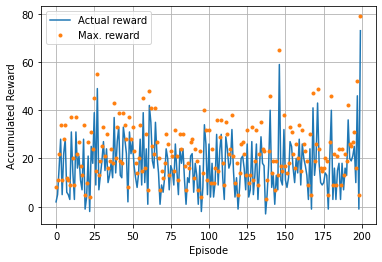

In [202]:
plt.plot(episode_reward, label='Actual reward')
plt.plot(max_reward, '.', label='Max. reward')
plt.xlabel('Episode')
plt.ylabel('Accumulated Reward')
plt.grid()
plt.legend()
plt.show()